# Choosing new values for krmax and kmax

## Goals:
 - only small changes to mean climate relative to default
 - improve p50 parameter sensitivity
 - improve 2-variable relationships, e.g. to drydown
 
## Specifics:
 - kmax is too high for shrubs and grasses
     - leading to very small p50 sensitivity
 - krmax varies by PFT, without strong justification

In [1]:
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import netCDF4
import os
%matplotlib inline

## What are the default values for kmax and krmax??

In [2]:
basepftfile = '/glade/p/cgd/tss/people/oleson/modify_param/clm5_params.c200402_kwo.c200422.nc'
defaults    = xr.open_dataset(basepftfile)
pftnames = ['BG','NEMT','NEBT','NDBT','BETT','BEMT','BDTT','BDMT','BDBT','BES','BDMS','BDBS','C3ArG','C3G','C4G','C3C']

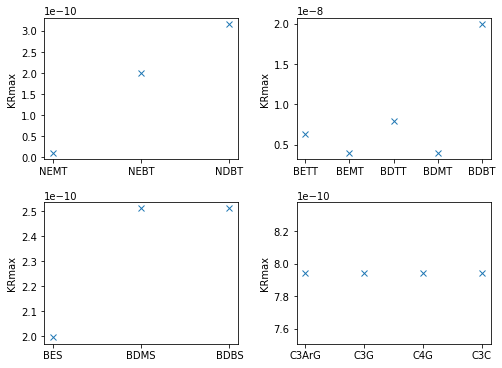

In [42]:
pftkey = [1,4,9,12,16]
plt.figure(figsize=[8,6])
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    krmax = defaults['krmax'][pftkey[i]:pftkey[i+1]].values
    plt.plot(1+np.arange(len(krmax)),krmax,'x')
    plt.xticks(1+np.arange(len(krmax)),pftnames[pftkey[i]:pftkey[i+1]])
    plt.ylabel('KRmax')
plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.3)

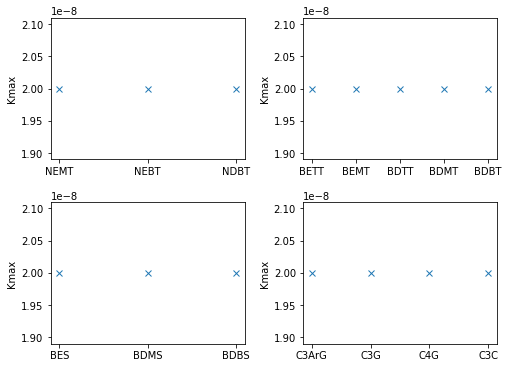

In [51]:
plt.figure(figsize=[8,6])
for i in range(4):
    plt.subplot(2,2,i+1)
    kmax = defaults['kmax'][0,pftkey[i]:pftkey[i+1]].values
    plt.plot(1+np.arange(len(kmax)),kmax,'x')
    plt.xticks(1+np.arange(len(kmax)),pftnames[pftkey[i]:pftkey[i+1]])
    plt.ylabel('Kmax')
plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.3)

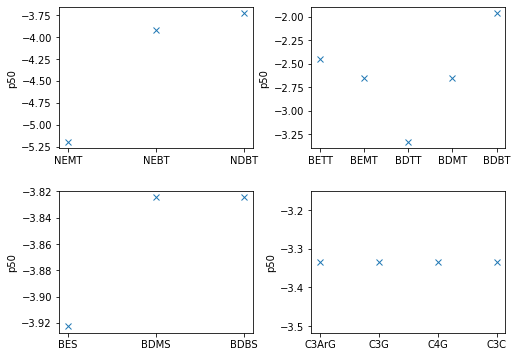

In [53]:
plt.figure(figsize=[8,6])
for i in range(4):
    plt.subplot(2,2,i+1)
    p50 = defaults['psi50'][0,pftkey[i]:pftkey[i+1]].values/101972
    plt.plot(1+np.arange(len(p50)),p50,'x')
    plt.xticks(1+np.arange(len(p50)),pftnames[pftkey[i]:pftkey[i+1]])
    plt.ylabel('p50')
plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.3)

## Start with KRmax
 - want to remove PFT variation, and choose a reasonable value
 - test for p50 sensitivity with a test of +50000 mm to the default p50
 - need to include this test for the default paramset as well
 - broadleaf evergreen trees likely the first to complain
 - start at 6.3e-9 (BETT default) and work down to 1.8e-9
 - may have to readjust upwards once we decrease kmax
 - likely necessary to iterate back and forth between adjusting krmax and kmax

In [10]:
krmax_vals = np.linspace(1.8e-9,6.3e-9,10)
ct = 1
for i in range(len(krmax_vals)):
    for j in range(2):
        ct +=1
        
        pftfile = 'paramfiles/PHSens'+str(ct).zfill(3)+'.nc'
        nlfile = 'nl_mods/PHSens'+str(ct).zfill(3)+'.txt'
        print(pftfile)
        cmd = 'cp '+basepftfile+' '+pftfile
        os.system(cmd)
        cmd = 'touch '+nlfile
        os.system(cmd)
        dset = netCDF4.Dataset(pftfile,'r+')
        dset['krmax'][:]=krmax_vals[i]

        if j==0:
            p50 = defaults['psi50'].copy(deep=True)+50000
            dset['psi50'][:]=p50.values
        dset.close()        


paramfiles/PHSens002.nc
paramfiles/PHSens003.nc
paramfiles/PHSens004.nc
paramfiles/PHSens005.nc
paramfiles/PHSens006.nc
paramfiles/PHSens007.nc
paramfiles/PHSens008.nc
paramfiles/PHSens009.nc
paramfiles/PHSens010.nc
paramfiles/PHSens011.nc
paramfiles/PHSens012.nc
paramfiles/PHSens013.nc
paramfiles/PHSens014.nc
paramfiles/PHSens015.nc
paramfiles/PHSens016.nc
paramfiles/PHSens017.nc
paramfiles/PHSens018.nc
paramfiles/PHSens019.nc
paramfiles/PHSens020.nc
paramfiles/PHSens021.nc


In [14]:
# also create a p50 perturbation for the default case
pftfile = 'paramfiles/PHSens'+str(1).zfill(3)+'.nc'
nlfile = 'nl_mods/PHSens'+str(1).zfill(3)+'.txt'
print(pftfile)
cmd = 'cp '+basepftfile+' '+pftfile
os.system(cmd)
cmd = 'touch '+nlfile
os.system(cmd)
p50 = defaults['psi50'].copy(deep=True)+50000
dset = netCDF4.Dataset(pftfile,'r+')
dset['psi50'][:]=p50.values
dset.close()

paramfiles/PHSens001.nc
